In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('white')
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
plt.style.reload_library()
plt.style.use(['science','grid']) ############## THIS ONE TO COOL EVERYTHING
from string import digits
import pickle
import re
import itertools

from IPython.display import display

In [ ]:
## Some general variables

location_figures = 'figures_policies/'

number_of_scenarios = 5
scenarios = [0,10,20,30,40]
number_of_replications = 10


# run = scenario *  10 + rep 
policies = ['policy 1', 'policy 2', 'policy 3']



# palettes
pal_scenarios = {0: "tab:blue", 1: "tab:orange", 2:"tab:green", 3: "tab:purple", 4:"tab:red"}
pal_attitudes = {"Cooperative": "tab:gray", "Competitive": "tab:pink", 'New-competitive':"tab:olive"}
pal_scenarios_10 = {0: "tab:blue", 10: "tab:orange", 20:"tab:green", 30: "tab:purple", 40:"tab:red"}


In [ ]:
## Load in the required data (csv + text):

# exp_comb.reset_index().to_feather("C:/Users/evabr/OneDrive/Ambiente de Trabalho/Universidade/Graduation/2. Models/00_FinalFolder_Thesis/10replications-baselineandpolicies(notcompleteoutcomes)/AllPolicie_combined")
exp_comb = pd.read_feather("data/AllPolicie_combined")

f = open("data/total_dict.pkl", "rb")
total_dict = pickle.load(f)
f.close()


In [ ]:
## Create a dataframe from the dictionary
# total_dict structure: total_dict[policies][scenarios][replications][kpi]
# Policies: 1, 2, 3
# Scenarios: 0, 1, 2, 3
# Replications: 0, ..., 9

# 0 infection-locations-coordinates
# 1 infection-locations-activity
# 2 attitude-infectee
# 3 infection-locations-activity-previous
# 4 attitude-infector
# 5 attitude-and-timeinqueue
# 6 comb_maxmin_queuingtime_cooperative
# 7 comb_maxmin_queuingtime_competitive
# 8 comb_maxmin_queuingtime_newcompetitive
# 9 cum_time_queue_attitude
# 10 nr_served_queue_attitude
# 11 avg_time_queue_attitude

df_total = pd.DataFrame(columns = ["policy", "scenario", "replication", "infection-locations-coordinates", "infection-locations-activity", "attitude-infectee", "infection-locations-activity-previous", "attitude-infector", "attitude-and-timeinqueue", "comb_maxmin_queuingtime_cooperative", "comb_maxmin_queuingtime_competitive", "comb_maxmin_queuingtime_newcompetitive", "cum_time_queue_attitude", "nr_served_queue_attitude", "avg_time_queue_attitude"])

In [ ]:
for policy in total_dict:
    for scenario in total_dict[policy]:
        for replication in total_dict[policy][scenario]:
            new_row = {'policy': policy, 'scenario':scenario, 'replication':replication, 'infection-locations-coordinates':total_dict[policy][scenario][replication][0], 
            'infection-locations-activity':total_dict[policy][scenario][replication][1], 'attitude-infectee':total_dict[policy][scenario][replication][2],
            'infection-locations-activity-previous':total_dict[policy][scenario][replication][3], 'attitude-infector':total_dict[policy][scenario][replication][4],
            'attitude-and-timeinqueue':total_dict[policy][scenario][replication][5], 'comb_maxmin_queuingtime_cooperative':total_dict[policy][scenario][replication][6],
            'comb_maxmin_queuingtime_competitive':total_dict[policy][scenario][replication][7], 'comb_maxmin_queuingtime_newcompetitive':total_dict[policy][scenario][replication][8],
            'cum_time_queue_attitude':total_dict[policy][scenario][replication][9], 'nr_served_queue_attitude':total_dict[policy][scenario][replication][10],
            'avg_time_queue_attitude':total_dict[policy][scenario][replication][11]}
            df_total = df_total.append(new_row, ignore_index=True)

#### KPIS: average time in queue + Cumulative cases

In [ ]:
df_total["avgQ"] = df_total.apply(lambda x: ((sum(x["cum_time_queue_attitude"].values()) / sum(x["nr_served_queue_attitude"].values()))), axis = 1)

In [ ]:
df_total_s1_s3 = df_total[(df_total["scenario"] == 1) | (df_total["scenario"] == 3)]

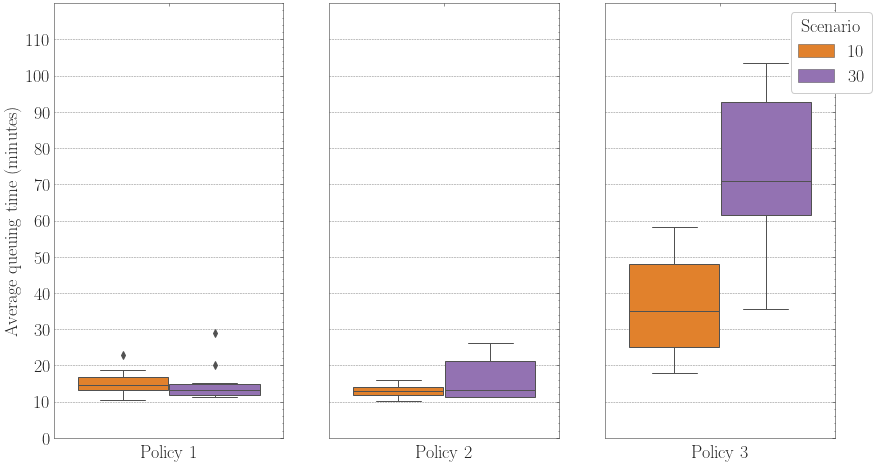

In [ ]:
df_total["avgQ"] = df_total.apply(lambda x: ((sum(x["cum_time_queue_attitude"].values()) / sum(x["nr_served_queue_attitude"].values()))), axis = 1)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14, 8), sharey=True)

sns.boxplot(x="policy", y="avgQ", hue = "scenario", data=df_total_s1_s3[df_total_s1_s3["policy"] == 1], palette = pal_scenarios, ax = ax1)
sns.boxplot(x="policy", y="avgQ", hue = "scenario", data=df_total_s1_s3[df_total_s1_s3["policy"] == 2], palette = pal_scenarios, ax = ax2)
sns.boxplot(x="policy", y="avgQ", hue = "scenario", data=df_total_s1_s3[df_total_s1_s3["policy"] == 3], palette = pal_scenarios, ax = ax3)

ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.legend(bbox_to_anchor = (1.2, 1), title='Scenario',title_fontsize=18, prop={'size':18})

legend = ax3.get_legend()
for t, l in zip(legend.texts,(10, 30)):
    t.set_text(l)

ax1.set_xlabel("Policy 1", size = 18)
ax2.set_xlabel("Policy 2", size = 18)
ax3.set_xlabel("Policy 3", size = 18)

ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])

ax1.set_ylabel("Average queuing time (minutes)", size = 18)
ax2.set_ylabel(None)
ax3.set_ylabel(None)

ax1.set_ylim([0,120])

yticks = np.arange(0, 120, step=10)

yticklabels = list() # 
for yt in range(len(yticks)):
    yticklabels.append( str(int(yticks[yt])))
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticklabels,fontsize=18)

# fig.text(0.5, 0.04, 'Policies', ha='center', size = 16)

# ax.set_xticklabels(["Policy 1", "Policy 2", "Policy 3"], size = 16)

# ax.set_xlabel(None)
# ax.set_ylabel("Average queuing time (minutes)", size = 16)
# ax.tick_params(axis = 'both', which = 'major', labelsize = 16)


# # Pad the saved area by 10% in the x-direction and 20% in the y-direction
# extent = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
# fig.savefig('REP_AveragequeingtimeP1.svg', bbox_inches=extent.expanded(1.45, 1.2))

# extent2 = ax2.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
# fig.savefig('REP_AveragequeingtimeP2.svg', bbox_inches=extent2.expanded(1.1, 1.2))

# extent3 = ax3.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
# fig.savefig('REP_AveragequeingtimeP3.svg', bbox_inches=extent3.expanded(1.35, 1.2))

ax1.figure.savefig('REP_AveragequeingtimeP1.svg')


plt.savefig(location_figures + "REP_Averagequeingtime.svg")

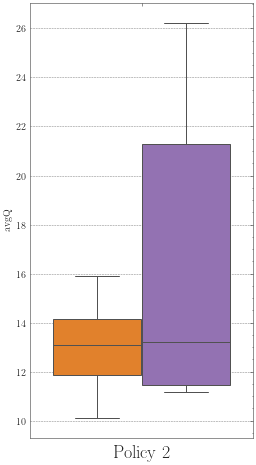

In [ ]:
fig, ax2 = plt.subplots(figsize = (4, 8))

sns.boxplot(x="policy", y="avgQ", hue = "scenario", data=df_total_s1_s3[df_total_s1_s3["policy"] == 2], palette = pal_scenarios, ax = ax2)

ax2.get_legend().remove()
ax2.set_xlabel("Policy 2", size = 18)
ax2.set_xticklabels([])

plt.savefig("REP_AveragequeingtimeP2.svg")

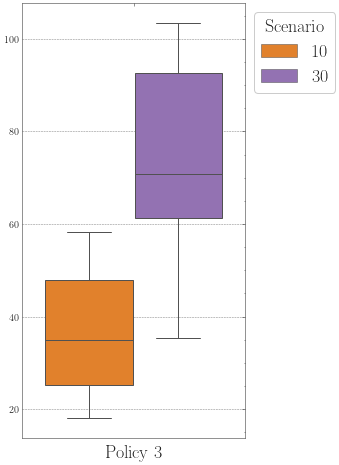

In [ ]:
fig, ax3 = plt.subplots(figsize = (4, 8))

sns.boxplot(x="policy", y="avgQ", hue = "scenario", data=df_total_s1_s3[df_total_s1_s3["policy"] == 3], palette = pal_scenarios, ax = ax3)

ax3.legend(bbox_to_anchor = (1, 1), title='Scenario',title_fontsize=18, prop={'size':18})

legend = ax3.get_legend()
for t, l in zip(legend.texts,(10, 30)):
    t.set_text(l)

ax3.set_xlabel("Policy 3", size = 18)
ax3.set_xticklabels([])
ax3.set_ylabel(None)

plt.savefig("REP_AveragequeingtimeP3.svg")

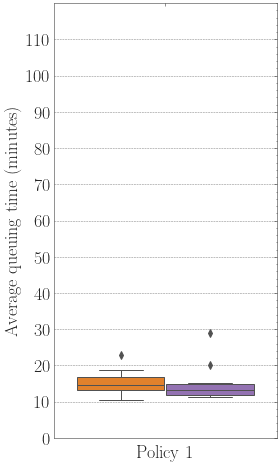

In [ ]:
fig, ax1 = plt.subplots(figsize = (4, 8))

sns.boxplot(x="policy", y="avgQ", hue = "scenario", data=df_total_s1_s3[df_total_s1_s3["policy"] == 1], palette = pal_scenarios, ax = ax1)

ax1.get_legend().remove()
ax1.set_xlabel("Policy 1", size = 18)
ax1.set_xticklabels([])
ax1.set_ylabel("Average queuing time (minutes)", size = 18)
ax1.set_ylim([0,120])

yticks = np.arange(0, 120, step=10)

yticklabels = list() # 
for yt in range(len(yticks)):
    yticklabels.append( str(int(yticks[yt])))
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticklabels,fontsize=18)

plt.savefig("REP_AveragequeingtimeP1.svg")

### Average queuing time per attitude

In [ ]:
df_avgq_attitude = df_total[["policy", "scenario", "replication", "avg_time_queue_attitude"]]

In [ ]:
df_avgq_attitude["Cooperative"] = df_avgq_attitude.apply(lambda x: x["avg_time_queue_attitude"]["cooperative"], axis = 1)
df_avgq_attitude["Competitive"] = df_avgq_attitude.apply(lambda x: x["avg_time_queue_attitude"]["competitive"], axis = 1)
df_avgq_attitude["New-competitive"] = df_avgq_attitude.apply(lambda x: x["avg_time_queue_attitude"]["new-competitive"], axis = 1)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [ ]:
df_avgq_attitude_s1_s3 = df_avgq_attitude[(df_avgq_attitude["scenario"] == 1) | (df_avgq_attitude["scenario"] == 3)]
dd=pd.melt(df_avgq_attitude_s1_s3,id_vars=['policy', 'scenario'],value_vars=["Cooperative",'Competitive', 'New-competitive'],var_name='Attitudes')

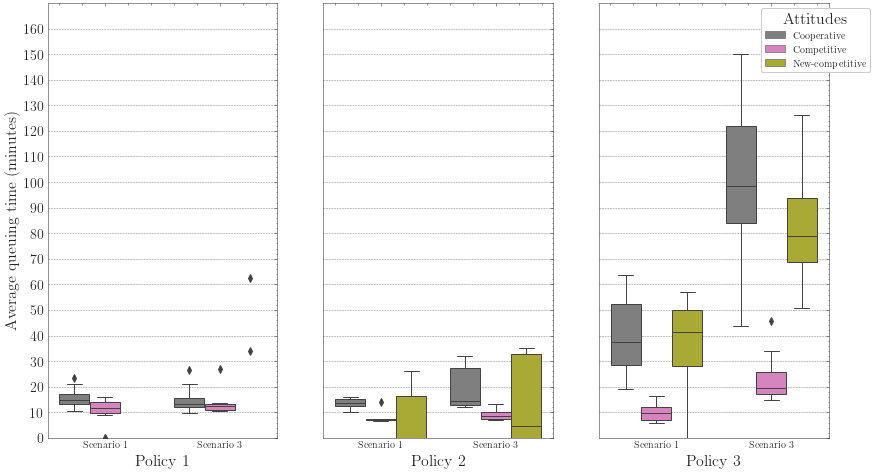

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14, 8), sharey=True)

sns.boxplot(x="scenario", y="value", hue = "Attitudes", data=dd[dd["policy"] == 1], palette = pal_attitudes, ax = ax1)
sns.boxplot(x="scenario", y="value", hue = "Attitudes", data=dd[dd["policy"] == 2], palette = pal_attitudes, ax = ax2)
sns.boxplot(x="scenario", y="value", hue = "Attitudes", data=dd[dd["policy"] == 3], palette = pal_attitudes, ax = ax3)

ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.legend(bbox_to_anchor = (1.2, 1), title='Attitudes',title_fontsize=16)

ax1.set_xlabel("Policy 1", size = 16)
ax2.set_xlabel("Policy 2", size = 16)
ax3.set_xlabel("Policy 3", size = 16)

ax1.set_xticklabels(["Scenario 1", "Scenario 3"])
ax2.set_xticklabels(["Scenario 1", "Scenario 3"])
ax3.set_xticklabels(["Scenario 1", "Scenario 3"])

ax1.set_ylabel("Average queuing time (minutes)", size = 16)
ax2.set_ylabel(None)
ax3.set_ylabel(None)

ax1.set_ylim([0,170])

#ax1.set_ylabel('Cumulative number of infections (-)', fontsize = 16)

yticks = np.arange(0, 170, step=10)

yticklabels = list() # 
for yt in range(len(yticks)):
    yticklabels.append( str(int(yticks[yt])))
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticklabels,fontsize=14)

plt.savefig(location_figures + "REP_waitingperattitude.svg")
plt.show()

## Likelihood to get infected

In [ ]:
matrix_get_infected = pd.DataFrame()

for policy in total_dict:
    # creating matrix with the info for the day of the fooddistribution
    policy = policy
    exp_comb_p1 = exp_comb[exp_comb['policy-implemented'] == 'policy %s' % policy]

    matrix= np.zeros([number_of_replications*number_of_scenarios,8])
    for scenario in total_dict[policy]:
        for replication in total_dict[policy][scenario]:
            
            
            run_number = scenario * 40 + policy * number_of_replications + 1 + replication
            # policy 
            # scenario per policy
            # replication 1-10

    #         run_number = scenario * number_of_replications + 1 + replication ## it was like this, see if i need to change
            selected_df = exp_comb_p1[exp_comb_p1['run'] == run_number]
            
            number_of_infections = selected_df.loc[selected_df['day'] == 41, 'cum_infected'].iloc[0]
            total_served = selected_df.loc[selected_df['day'] == 41, 'total-served'].iloc[0]
            number_comp_served = selected_df.loc[selected_df['day'] == 41, 'number-competitive-joining'].iloc[0]
            number_newcomp_served = selected_df.loc[selected_df['day'] == 41, 'number-new-competitive'].iloc[0]
            
            
            
            df = pd.DataFrame({'place':total_dict[policy][scenario][replication][1],'attitude':total_dict[policy][scenario][replication][2]})
            # filter to get only the infections that happened until day 9
            df = df.iloc[0:number_of_infections]  

            # from these, get the infections that happened at the food distribution
            df = df['attitude'][df['place']=='fooddistro']
        
            nbr_coop_infected = 0
            nbr_comp_infected = 0
            nbr_ncomp_infected = 0
            
            # count the number of cooperative and competitive people who got infected at the food distribution
            for index, value in df.items():
                
                if value == 'cooperative':
                    nbr_coop_infected = nbr_coop_infected + 1
                if value == 'competitive':
                    nbr_comp_infected = nbr_comp_infected + 1
                if value == 'new-competitive':
                    nbr_ncomp_infected = nbr_ncomp_infected + 1
                    
            
            matrix[number_of_replications*scenario+replication,0] = scenario
            matrix[number_of_replications*scenario+replication,1] = replication
            matrix[number_of_replications*scenario+replication,2] = total_served
            matrix[number_of_replications*scenario+replication,3] = number_comp_served
            matrix[number_of_replications*scenario+replication,4] = number_newcomp_served
            matrix[number_of_replications*scenario+replication,5] = nbr_comp_infected
            matrix[number_of_replications*scenario+replication,6] = nbr_coop_infected 
            matrix[number_of_replications*scenario+replication,7] = nbr_ncomp_infected 


    matrix = pd.DataFrame(matrix, columns = ["scenario", "replication", "total-served", "competitive-served", "new-competitive-served", "competitive-infected", "cooperative-infected", "new-competitive-infected" ])


    # Calculating likelihoods

    # COMPETITIVE: nbr of competitive people infected in the food distribution / nbr of competitive people served (number of competitive people served)
    # COOPERATIVE: nbr of cooperative people infected in the first food distribution / nbr of cooperative people served (total-served - number of competitive people served)

    # likelihood cooperative
    #matrix["likelihood-cooperative"] = matrix["cooperative-infected"] / (matrix["total-served"] - matrix["competitive-served"] - matrix["new-competitive-served"]) 
    matrix["Cooperative"] = matrix["cooperative-infected"] / (matrix["total-served"] - matrix["competitive-served"]) 
    # likelihood competitive
    #matrix["likelihood-competitive"] = matrix["competitive-infected"] / (matrix["new-competitive-served"] + matrix["competitive-served"])
    matrix["Competitive"] = matrix["competitive-infected"] /  matrix["competitive-served"]
    # likelihood new competitive
    matrix['New-competitive'] = matrix["new-competitive-infected"] /  matrix["new-competitive-served"]


    # Preparing data for visualization
    matrix = matrix.melt(id_vars=['scenario', 'replication'], 
                value_vars=[ "Cooperative", "Competitive", "New-competitive"],
                var_name='Attitude', value_name='Likelihood')

    matrix["policy"] = policy
    matrix_get_infected = matrix_get_infected.append(matrix, ignore_index = True)

matrix_get_infected = matrix_get_infected[(matrix_get_infected['scenario'] == 1.0) | (matrix_get_infected['scenario'] == 3.0)]

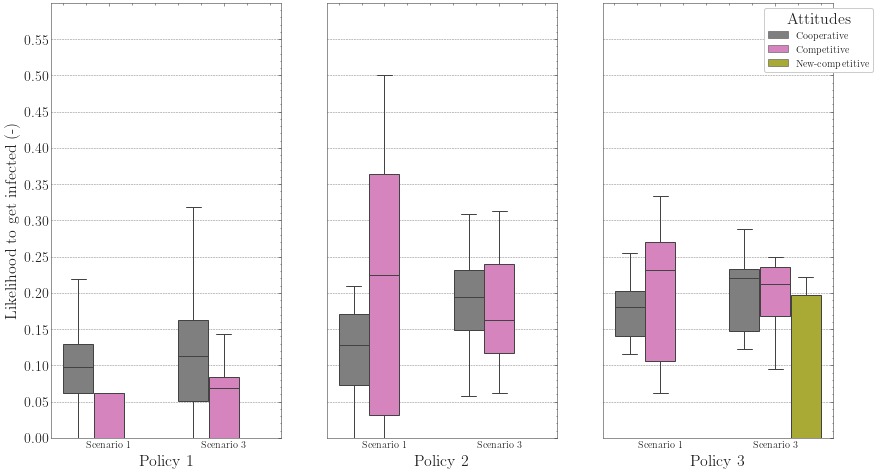

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14, 8), sharey=True)

sns.boxplot(x='scenario', y='Likelihood', hue='Attitude', data=matrix_get_infected[matrix_get_infected["policy"] == 1], palette=pal_attitudes, showfliers = False, ax = ax1)  
sns.boxplot(x='scenario', y='Likelihood', hue='Attitude', data=matrix_get_infected[matrix_get_infected["policy"] == 2], palette=pal_attitudes, showfliers = False, ax = ax2)  
sns.boxplot(x='scenario', y='Likelihood', hue='Attitude', data=matrix_get_infected[matrix_get_infected["policy"] == 3], palette=pal_attitudes, showfliers = False, ax = ax3)  

ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.legend(bbox_to_anchor = (1.2, 1), title='Attitudes',title_fontsize=16)

ax1.set_xlabel("Policy 1", size = 16)
ax2.set_xlabel("Policy 2", size = 16)
ax3.set_xlabel("Policy 3", size = 16)

ax1.set_xticklabels(["Scenario 1", "Scenario 3"])
ax2.set_xticklabels(["Scenario 1", "Scenario 3"])
ax3.set_xticklabels(["Scenario 1", "Scenario 3"])

ax1.set_ylabel("Likelihood to get infected (-)", size = 16)
ax2.set_ylabel(None)
ax3.set_ylabel(None)

ax1.set_ylim([0, 0.6])

yticks = np.arange(0, 0.6, step=0.05)

yticklabels = list() # 
for yt in range(len(yticks)):
    yticklabels.append("{:.2f}".format((float(yticks[yt]))))
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticklabels,fontsize=14)


plt.savefig(location_figures + "REP_likelihoodtogetinfected.svg")
plt.show()

### Likelihood to infect others

In [ ]:
# creating matrix with the info for the day of the fooddistribution

matrix_infect_others = pd.DataFrame()

for policy in total_dict:
    # creating matrix with the info for the day of the fooddistribution
    policy = policy
    exp_comb_p1 = exp_comb[exp_comb['policy-implemented'] == 'policy %s' % policy]


    matrix= np.zeros([number_of_replications*number_of_scenarios,10])
    for scenario in total_dict[policy]:
        for replication in total_dict[policy][scenario]:
            
            run_number = scenario * 40 + policy * number_of_replications + 1 + replication
            selected_df = exp_comb_p1[exp_comb_p1['run'] == run_number]
            
            number_of_infections = selected_df.loc[selected_df['day'] == 41, 'cum_infected'].iloc[0]
            total_served = selected_df.loc[selected_df['day'] == 41, 'total-served'].iloc[0]
            number_comp_served = selected_df.loc[selected_df['day'] == 41, 'number-competitive-joining'].iloc[0]
            number_newcomp_served = selected_df.loc[selected_df['day'] == 41, 'number-new-competitive'].iloc[0]
            
            # if i want to include the number of infectious people around 
            number_infectious_comp = selected_df.loc[selected_df['day'] == 41, 'nbr-infectious-competitive'].iloc[0]
            number_infectious_coop = selected_df.loc[selected_df['day'] == 41, 'nbr-infectious-cooperative'].iloc[0]

            ### now with the focus on the infector (hence the [4])
            df = pd.DataFrame({'place':total_dict[policy][scenario][replication][1],'attitude':total_dict[policy][scenario][replication][4]})
            # filter to get only the infections that happened until day 9
            df = df.iloc[0:number_of_infections]  

            # from these, get the infections that happened at the food distribution
            df = df['attitude'][df['place']=='fooddistro']
            

            
            nbr_coop_infector = 0
            nbr_comp_infector = 0
            nbr_ncomp_infector = 0
            
            # count the number of cooperative and competitive people who got infected at the food distribution
            for index, value in df.items():
                
                if value == 'cooperative':
                    nbr_coop_infector = nbr_coop_infector + 1
                if value == 'competitive':
                    nbr_comp_infector = nbr_comp_infector + 1
            
            # took it out to experiment
                if value == 'new-competitive':
                    nbr_ncomp_infector = nbr_ncomp_infector + 1
            
            matrix[number_of_replications*scenario+replication,0] = scenario
            matrix[number_of_replications*scenario+replication,1] = replication
            matrix[number_of_replications*scenario+replication,2] = total_served
            matrix[number_of_replications*scenario+replication,3] = number_comp_served
            matrix[number_of_replications*scenario+replication,4] = number_newcomp_served
            matrix[number_of_replications*scenario+replication,5] = nbr_comp_infector
            matrix[number_of_replications*scenario+replication,6] = nbr_coop_infector 
            matrix[number_of_replications*scenario+replication,7] = nbr_ncomp_infector 
            matrix[number_of_replications*scenario+replication,8] = number_infectious_comp
            matrix[number_of_replications*scenario+replication,9] = number_infectious_coop

            
    matrix = pd.DataFrame(matrix, columns = ["scenario", "replication", "total-served", "competitive-served", "new-competitive-served", "competitive-infector", "cooperative-infector", "new-competitive-infector", "number-infectious-comp", "number-infectious-coop"])

    #matrix["Cooperative"] = matrix["cooperative-infector"] / (matrix["total-served"] - matrix["competitive-served"]) 
    #matrix["Competitive"] = matrix["competitive-infector"] / matrix["competitive-served"]
    #matrix["New-competitive"] = matrix["new-competitive-infector"] / matrix["new-competitive-served"]

    # what if i calculate this dividing by the total number infectious wth that behaviour?
    matrix["Cooperative"] = ((matrix["cooperative-infector"] + matrix['new-competitive-infector'])/ (matrix["number-infectious-coop"] * (matrix['total-served'] - matrix['competitive-served'])))*10
    matrix["Competitive"] = (matrix["competitive-infector"] / (matrix['number-infectious-comp'] * matrix['competitive-served']))*10 

    #matrix["New-competitive"] = matrix["new-competitive-infector"] / matrix["new-competitive-served"]


    # Preparing data for visualization
    matrix = matrix.melt(id_vars=['scenario', 'replication'], 
                value_vars=[ "Cooperative", "Competitive"],
                var_name='Attitude', value_name='Likelihood infecting')
    
    matrix["policy"] = policy
    matrix_infect_others = matrix_infect_others.append(matrix, ignore_index = True)

matrix_infect_others = matrix_infect_others[(matrix_infect_others['scenario'] == 1.0) | (matrix_infect_others['scenario'] == 3.0)]

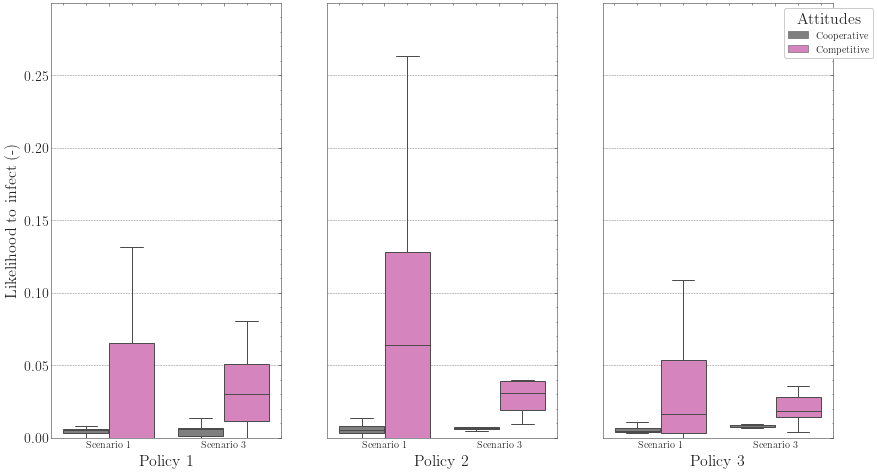

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14, 8), sharey=True)

sns.boxplot(x='scenario', y='Likelihood infecting', hue='Attitude', data=matrix_infect_others[matrix_infect_others["policy"] == 1], palette=pal_attitudes, showfliers = False, ax = ax1)  
sns.boxplot(x='scenario', y='Likelihood infecting', hue='Attitude', data=matrix_infect_others[matrix_infect_others["policy"] == 2], palette=pal_attitudes, showfliers = False, ax = ax2)  
sns.boxplot(x='scenario', y='Likelihood infecting', hue='Attitude', data=matrix_infect_others[matrix_infect_others["policy"] == 3], palette=pal_attitudes, showfliers = False, ax = ax3)  

ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.legend(bbox_to_anchor = (1.2, 1), title='Attitudes',title_fontsize=16)

ax1.set_xlabel("Policy 1", size = 16)
ax2.set_xlabel("Policy 2", size = 16)
ax3.set_xlabel("Policy 3", size = 16)

ax1.set_xticklabels(["Scenario 1", "Scenario 3"])
ax2.set_xticklabels(["Scenario 1", "Scenario 3"])
ax3.set_xticklabels(["Scenario 1", "Scenario 3"])

ax1.set_ylabel("Likelihood to infect (-)", size = 16)
ax2.set_ylabel(None)
ax3.set_ylabel(None)

ax1.set_ylim([0, 0.3])

yticks = np.arange(0, 0.3, step=0.05)

yticklabels = list() # 
for yt in range(len(yticks)):
    yticklabels.append("{:.2f}".format((float(yticks[yt]))))
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticklabels,fontsize=14)


plt.savefig(location_figures + "REP_likelihoodtoinfect.svg")
plt.show()

### Location of Infections

In [ ]:
evaluation_moments_day = [7,13,35,41]
policies = [1, 2, 3]
pal_locations = {"shelter": "lightcoral", "waterpoint": "goldenrod", 'fooddistro':"tab:brown", 'latrine': "tab:cyan", "hc-fac":"cornflowerblue"}


In [ ]:
matrix_location_infections = pd.DataFrame()

for policy in total_dict:
    policy = policy
    exp_comb_p1 = exp_comb[exp_comb['policy-implemented'] == 'policy %s' % policy]

    for scenario in total_dict[policy]:

        for replication in total_dict[policy][scenario]: 
        
            run_number = scenario * 40 + policy * number_of_replications + 1 + replication
            
            selected_df = exp_comb_p1[exp_comb_p1['run'] == run_number ] 
            
            tempdict = {}
            
            for day in evaluation_moments_day:
                
                number_of_infections = selected_df.loc[selected_df['day'] == day,'cum_infected'].iloc[0]
                tempdict[day] = total_dict[policy][scenario][replication][1][0:number_of_infections - 1]
                
            total_dict[policy][scenario][replication][10] = tempdict
            
    matrix= np.zeros([number_of_replications*number_of_scenarios, 6])

    locations = ['shelter','waterpoint', 'latrine', 'hc-fac', 'fooddistro']
        
    for scenario in total_dict[policy]:
        for replication in total_dict[policy][scenario]:  
            total_dict[policy][scenario][replication][11] = {7: 0, 13: 0, 35: 0, 41: 0}
            
            for evaluation_day in total_dict[policy][scenario][replication][10]:
                count_shelter = 0
                count_waterpoint = 0
                count_latrine = 0
                count_hcfac = 0
                count_fooddistro = 0
                
                temp_loc_dict = {}
                
                for entry in total_dict[policy][scenario][replication][10][evaluation_day]:
        
                    if entry == 'shelter':
                        count_shelter = count_shelter + 1
                    if entry == 'waterpoint':
                        count_waterpoint = count_waterpoint + 1
                    if entry == 'latrine':
                        count_latrine = count_latrine + 1
                    if entry == 'hcfac':
                        count_hcfac = count_hcfac + 1
                    if entry == 'fooddistro':
                        count_fooddistro = count_fooddistro + 1
                
                
                temp_loc_dict[evaluation_day] = {'shelter': count_shelter, 'waterpoint': count_waterpoint,
                                                'latrine': count_latrine, 'hcfac': count_hcfac,
                                                'fooddistro': count_fooddistro}
                
                total_dict[policy][scenario][replication][11][evaluation_day] = temp_loc_dict[evaluation_day]
                
    for day in evaluation_moments_day:
        matrix_firstmoment = np.zeros([number_of_replications*number_of_scenarios,7])
        for scenario in total_dict[policy]:
            for replication in total_dict[policy][scenario]:
                matrix_firstmoment[number_of_replications*scenario+replication,0] = scenario
                matrix_firstmoment[number_of_replications*scenario+replication,1] = replication
                matrix_firstmoment[number_of_replications*scenario+replication,2] = total_dict[policy][scenario][replication][11][day]['shelter']
                matrix_firstmoment[number_of_replications*scenario+replication,3] = total_dict[policy][scenario][replication][11][day]['waterpoint']
                matrix_firstmoment[number_of_replications*scenario+replication,4] = total_dict[policy][scenario][replication][11][day]['latrine']
                matrix_firstmoment[number_of_replications*scenario+replication,5] = total_dict[policy][scenario][replication][11][day]['hcfac']
                matrix_firstmoment[number_of_replications*scenario+replication,6] = total_dict[policy][scenario][replication][11][day]['fooddistro']

        matrix_firstmoment = pd.DataFrame(matrix_firstmoment, columns = ["scenario", "replication", "shelter", "waterpoint", "latrine", "hc-fac", "fooddistro" ])
        # only selecting scenario 1 and scenario 3
        matrix_firstmoment = matrix_firstmoment[(matrix_firstmoment['scenario'] == 1.0) | (matrix_firstmoment['scenario'] == 3.0)]
        matrix_firstmoment = matrix_firstmoment.melt(id_vars=['scenario', 'replication'], 
                    value_vars=[ "shelter", "waterpoint", "latrine", "fooddistro"],
                    var_name='Location', value_name='Infections')

        matrix_firstmoment["policy"] = policy
        matrix_firstmoment["day"] = day
        matrix_location_infections = matrix_location_infections.append(matrix_firstmoment, ignore_index = True)

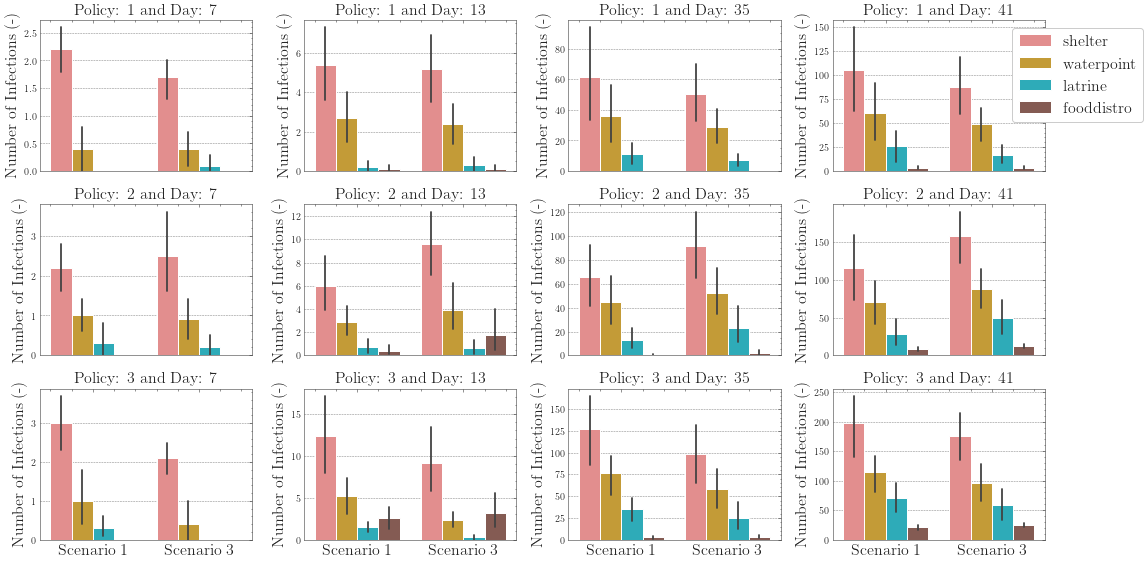

In [ ]:
fig, axes = plt.subplots(figsize = (16, 8),  nrows=3, ncols=4, sharex = True)

def trim_axs(axs, N):
    """little helper to massage the axs list to have correct length..."""
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

axes = trim_axs(axes, 12)

for (policy, day), ax in zip(itertools.product(policies, evaluation_moments_day), axes):
    df = matrix_location_infections[(matrix_location_infections["policy"] == policy) & (matrix_location_infections["day"] == day)]
    sns.barplot(x='scenario', y='Infections', hue='Location', data=df, palette=pal_locations, ax = ax)
    ax.set_title("Policy: " + str(policy) + " and " + "Day: " + str(day), size = 16)
    ax.set_xticklabels(["Scenario 1", "Scenario 3"], size = 16)
    ax.set_xlabel(None)
    ax.set_ylabel("Number of Infections (-)", size = 16)

    if (policy == 1) & (day == 41):
        ax.legend(bbox_to_anchor = (1.5, 1), prop={'size': 16})
    else:
        ax.get_legend().remove()

plt.tight_layout()
plt.savefig(location_figures + "REP_distribution_all.svg")
plt.show()

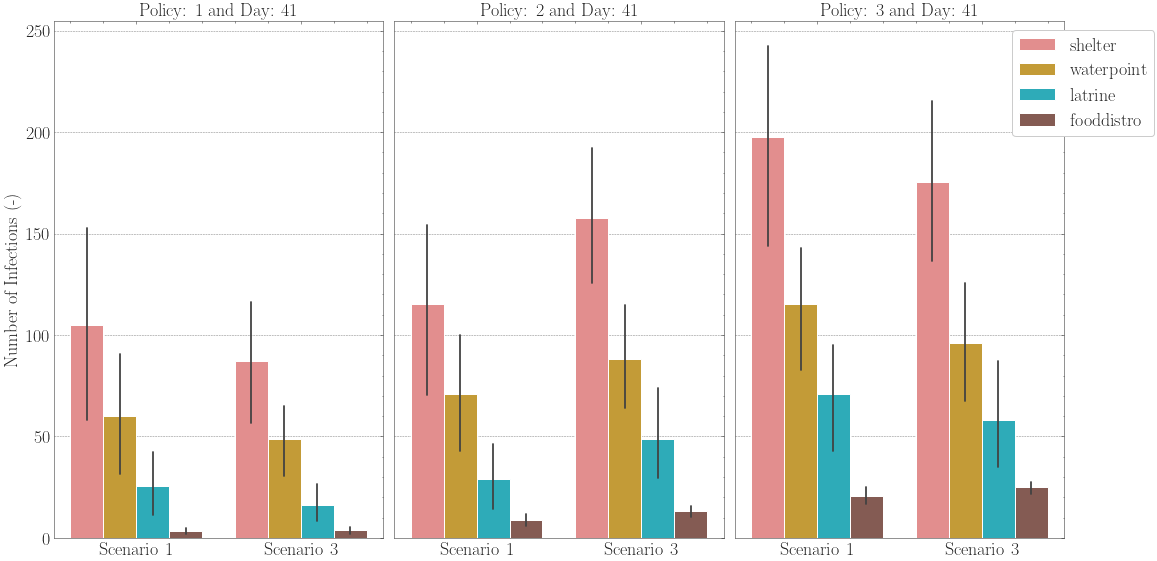

In [ ]:
fig, axes = plt.subplots(figsize = (16, 8),  nrows=1, ncols=3, sharex = True, sharey = True)

def trim_axs(axs, N):
    """little helper to massage the axs list to have correct length..."""
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

axes = trim_axs(axes, 12)

for policy, ax in zip(policies, axes):
    df = matrix_location_infections[(matrix_location_infections["policy"] == policy) & (matrix_location_infections["day"] == 41)]
    sns.barplot(x='scenario', y='Infections', hue='Location', data=df, palette=pal_locations, ax = ax)
    ax.set_title("Policy: " + str(policy) + " and " + "Day: " + str(day), size = 18)
    ax.set_xticklabels(["Scenario 1", "Scenario 3"], size = 18)
    ax.set_xlabel(None)
    ax.tick_params(axis='y', labelsize=18)
    ax.tick_params(axis='x', labelsize=18)

    if (policy == 1) & (day == 41):
        ax.set_ylabel("Number of Infections (-)", size = 18)
    else:
        ax.set_ylabel(None)

    if (policy == 3) & (day == 41):
        ax.legend(bbox_to_anchor = (1.3, 1),  prop={'size': 18})
    else:
        ax.get_legend().remove()

plt.tight_layout()

# Pad the saved area by 10% in the x-direction and 20% in the y-direction
extent = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('REP_AveragequeingtimeP1.svg', bbox_inches=extent.expanded(1.1, 1.2))

extent2 = ax2.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('REP_AveragequeingtimeP2.svg', bbox_inches=extent2.expanded(1.1, 1.2))

extent3 = ax3.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('REP_AveragequeingtimeP3.svg', bbox_inches=extent3.expanded(1.1, 1.2))


plt.savefig(location_figures + "REP_distribution_lastday.svg")
plt.show()

### Cumulative Plots

In [ ]:
exp_comb = exp_comb.rename({"cum_infected" : "cum-infected"}, axis = 1)
exp_comb_s1_s3 = exp_comb[(exp_comb['scenario:percentage-competitive'] == 10) | (exp_comb['scenario:percentage-competitive'] == 30)]
exp_comb_s1_s3 = exp_comb_s1_s3[exp_comb_s1_s3["policy-implemented"] != "policy 0 (baseline)"]

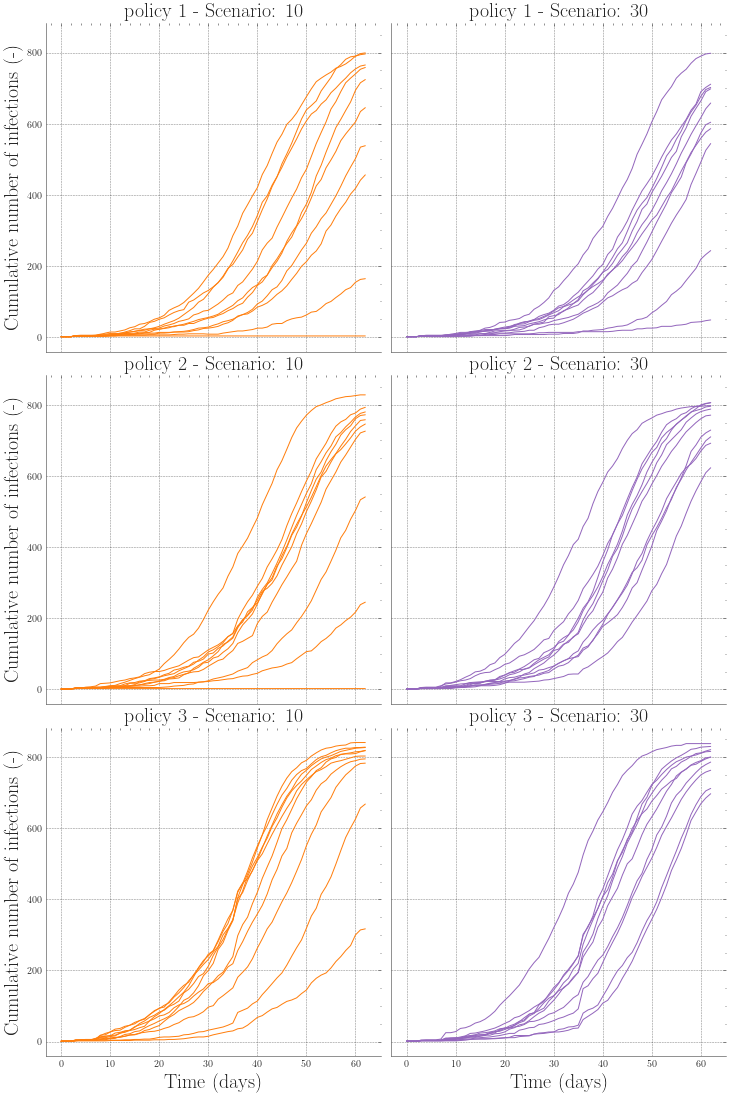

In [ ]:
g = sns.relplot(data=exp_comb_s1_s3, x="day", y="cum-infected", hue="scenario:percentage-competitive", col='scenario:percentage-competitive', row="policy-implemented", kind = "line",  palette = pal_scenarios_10, style = 'run', legend = False, dashes= False ).set_axis_labels("Time (days)", "Cumulative number of infections (-)", size = 20).set_titles("{row_name} - Scenario: {col_name}% competitive", size = 20)

g.savefig(location_figures + "REP_CumulativeInfections_Spaghetti_all.svg")

In [ ]:
exp_comb_s1_s3_p1 = exp_comb_s1_s3[exp_comb_s1_s3["policy-implemented"] == "policy 1"]

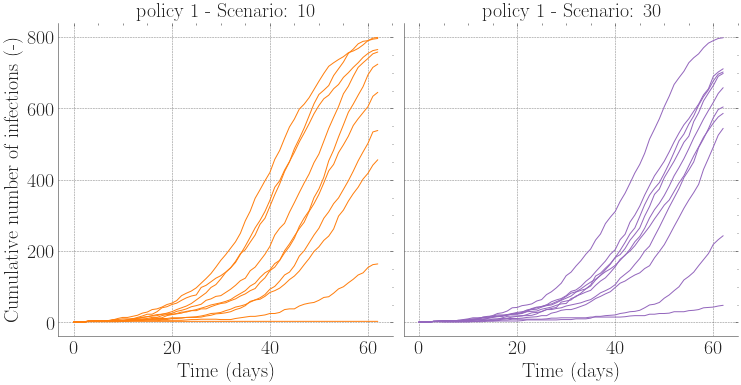

In [ ]:
g = sns.relplot(data=exp_comb_s1_s3_p1, x="day", y="cum-infected", hue="scenario:percentage-competitive", col='scenario:percentage-competitive', row="policy-implemented", kind = "line",  palette = pal_scenarios_10, style = 'run', legend = False, dashes= False ).set_axis_labels("Time (days)", "Cumulative number of infections (-)", size = 20).set_titles("{row_name} - Scenario: {col_name}% competitive", size = 20)

for ax in g.axes.flat:
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20)

g.savefig(location_figures + "REP_CumulativeInfections_Spaghetti_P1.svg")

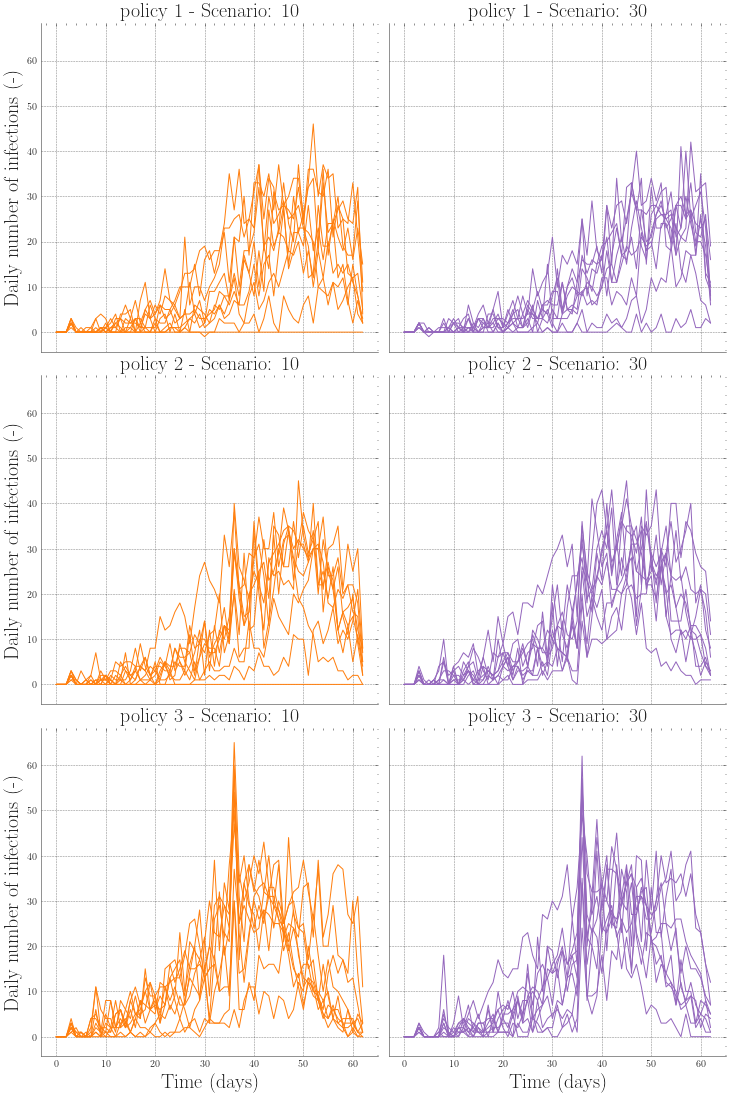

In [ ]:
g = sns.relplot(data=exp_comb_s1_s3, x="day", y="daily-infections", hue="scenario:percentage-competitive", col='scenario:percentage-competitive', row="policy-implemented", kind = "line",  palette = pal_scenarios_10, style = 'run', legend = False, dashes= False ).set_axis_labels("Time (days)", "Daily number of infections (-)", size = 20).set_titles("{row_name} - Scenario: {col_name}% competitive", size = 20)

g.savefig(location_figures + "REP_DailyInfections_Spaghetti_all.svg")

evaluation_moments_day = [7,13,35,41]
pal_locations = {"shelter": "lightcoral", "waterpoint": "goldenrod", 'fooddistro':"tab:brown", 'latrine': "tab:cyan", "hc-fac":"cornflowerblue"}

In [ ]:
exp_comb_s1_s3_newcomp = exp_comb_s1_s3[exp_comb_s1_s3['day'] == 9]
exp_comb_s1_s3_newcomp = exp_comb_s1_s3_newcomp[exp_comb_s1_s3_newcomp["policy-implemented"] != "policy 0 (baseline)"]

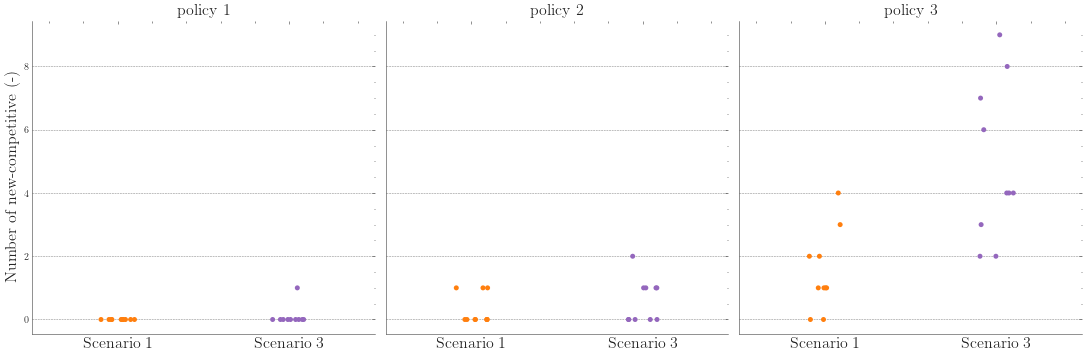

In [ ]:
g = sns.catplot(x="scenario:percentage-competitive", y="number-new-competitive", hue="scenario:percentage-competitive", col="policy-implemented", data=exp_comb_s1_s3_newcomp, palette = pal_scenarios_10).set_axis_labels("", "Number of new-competitive (-)", size = 16).set_xticklabels(["Scenario 1", "Scenario 3"], size = 16).set_titles("{col_name}", size = 16)
g.savefig(location_figures + "REP_NumberNewComp_all.svg")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ff502ce8-25da-4e4a-b841-dc0e7d23f282' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>